# Exploring Students 2 Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
students2_math = pd.read_csv("/Users/johnathangarcia/Downloads/studentPerformancePredictor/data/student/student2Math.csv", sep=';')
students2_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
students2_portugese = pd.read_csv("/Users/johnathangarcia/Downloads/studentPerformancePredictor/data/student/student2Portugese.csv", sep=';')
students2_portugese.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
students2 = pd.concat([students2_math, students2_portugese], ignore_index = True)
students2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
students2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [7]:
students2 = students2.drop(columns = ["school", "address", "Pstatus", "famsize", "Mjob", "Fjob", "reason", "guardian", "traveltime", "schoolsup", "failures", "nursery", "romantic", "goout", "Dalc", "Walc"])

In [8]:
students2.head()

,sex,age,Medu,Fedu,studytime,famsup,paid,activities,higher,internet,famrel,freetime,health,absences,G1,G2,G3
0,F,18,4,4,2,no,no,no,yes,no,4,3,3,6,5,6,6
1,F,17,1,1,2,yes,no,no,yes,yes,5,3,3,4,5,5,6
2,F,15,1,1,2,no,yes,no,yes,yes,4,3,3,10,7,8,10
3,F,15,4,2,3,yes,yes,yes,yes,yes,3,2,5,2,15,14,15
4,F,16,3,3,2,yes,yes,no,yes,no,4,3,5,4,6,10,10


Education:

- 0: None
- 3: high school
- 4: bachelors or higher 

In [9]:
students2["Medu"] = np.where(students2["Medu"] <= 2, 0, students2["Medu"])
students2["Fedu"] = np.where(students2["Fedu"] <= 2, 0, students2["Fedu"])

In [10]:
students2.head()

,sex,age,Medu,Fedu,studytime,famsup,paid,activities,higher,internet,famrel,freetime,health,absences,G1,G2,G3
0,F,18,4,4,2,no,no,no,yes,no,4,3,3,6,5,6,6
1,F,17,0,0,2,yes,no,no,yes,yes,5,3,3,4,5,5,6
2,F,15,0,0,2,no,yes,no,yes,yes,4,3,3,10,7,8,10
3,F,15,4,0,3,yes,yes,yes,yes,yes,3,2,5,2,15,14,15
4,F,16,3,3,2,yes,yes,no,yes,no,4,3,5,4,6,10,10


In [11]:
students2["ParentalEducation"] = (students2["Medu"] + students2["Fedu"]) / 2

In [12]:
students2.head()

,sex,age,Medu,Fedu,studytime,famsup,paid,activities,higher,internet,famrel,freetime,health,absences,G1,G2,G3,ParentalEducation
0,F,18,4,4,2,no,no,no,yes,no,4,3,3,6,5,6,6,4.0
1,F,17,0,0,2,yes,no,no,yes,yes,5,3,3,4,5,5,6,0.0
2,F,15,0,0,2,no,yes,no,yes,yes,4,3,3,10,7,8,10,0.0
3,F,15,4,0,3,yes,yes,yes,yes,yes,3,2,5,2,15,14,15,2.0
4,F,16,3,3,2,yes,yes,no,yes,no,4,3,5,4,6,10,10,3.0


In [13]:
students2 = students2.drop(columns = ["Fedu", "Medu"])
students2.head()

,sex,age,studytime,famsup,paid,activities,higher,internet,famrel,freetime,health,absences,G1,G2,G3,ParentalEducation
0,F,18,2,no,no,no,yes,no,4,3,3,6,5,6,6,4.0
1,F,17,2,yes,no,no,yes,yes,5,3,3,4,5,5,6,0.0
2,F,15,2,no,yes,no,yes,yes,4,3,3,10,7,8,10,0.0
3,F,15,3,yes,yes,yes,yes,yes,3,2,5,2,15,14,15,2.0
4,F,16,2,yes,yes,no,yes,no,4,3,5,4,6,10,10,3.0


In [14]:
students2 = students2.rename(columns = {'sex': 'Gender'})
students2.head()

,Gender,age,studytime,famsup,paid,activities,higher,internet,famrel,freetime,health,absences,G1,G2,G3,ParentalEducation
0,F,18,2,no,no,no,yes,no,4,3,3,6,5,6,6,4.0
1,F,17,2,yes,no,no,yes,yes,5,3,3,4,5,5,6,0.0
2,F,15,2,no,yes,no,yes,yes,4,3,3,10,7,8,10,0.0
3,F,15,3,yes,yes,yes,yes,yes,3,2,5,2,15,14,15,2.0
4,F,16,2,yes,yes,no,yes,no,4,3,5,4,6,10,10,3.0


In [15]:
students2["Gender"] = students2["Gender"].map({'M': 0,
                                         'F': 1})
students2.head()

,Gender,age,studytime,famsup,paid,activities,higher,internet,famrel,freetime,health,absences,G1,G2,G3,ParentalEducation
0,1,18,2,no,no,no,yes,no,4,3,3,6,5,6,6,4.0
1,1,17,2,yes,no,no,yes,yes,5,3,3,4,5,5,6,0.0
2,1,15,2,no,yes,no,yes,yes,4,3,3,10,7,8,10,0.0
3,1,15,3,yes,yes,yes,yes,yes,3,2,5,2,15,14,15,2.0
4,1,16,2,yes,yes,no,yes,no,4,3,5,4,6,10,10,3.0


In [16]:
students2 = students2.rename(columns = {'age': 'Age',
                                        'studytime': 'StudyTimeWeekly',
                                        'famsup': 'ParentalSupport',
                                        'paid': 'Tutoring',
                                        'activities': 'Extracurricular',
                                        'higher': 'PursueHigherEducation',
                                        'internet': 'InternetAccessAtHome',
                                        'famrel': 'StrengthOfFamilialRelationship',
                                        'freetime': 'FreetimeAfterSchool',
                                        'health': 'HealthStatus',
                                        'absences': 'Absences',
                                        'G1': 'FirstPeriodGrade',
                                        'G2': 'SecondPeriodGrade',
                                        'G3': 'FinalGrade'})
students2.head()

,Gender,Age,StudyTimeWeekly,ParentalSupport,Tutoring,Extracurricular,PursueHigherEducation,InternetAccessAtHome,StrengthOfFamilialRelationship,FreetimeAfterSchool,HealthStatus,Absences,FirstPeriodGrade,SecondPeriodGrade,FinalGrade,ParentalEducation
0,1,18,2,no,no,no,yes,no,4,3,3,6,5,6,6,4.0
1,1,17,2,yes,no,no,yes,yes,5,3,3,4,5,5,6,0.0
2,1,15,2,no,yes,no,yes,yes,4,3,3,10,7,8,10,0.0
3,1,15,3,yes,yes,yes,yes,yes,3,2,5,2,15,14,15,2.0
4,1,16,2,yes,yes,no,yes,no,4,3,5,4,6,10,10,3.0


In [17]:
students2['GPA'] = ((students2['FinalGrade'] / 20) * 4).round(2)
students2.head()

,Gender,Age,StudyTimeWeekly,ParentalSupport,Tutoring,Extracurricular,PursueHigherEducation,InternetAccessAtHome,StrengthOfFamilialRelationship,FreetimeAfterSchool,HealthStatus,Absences,FirstPeriodGrade,SecondPeriodGrade,FinalGrade,ParentalEducation,GPA
0,1,18,2,no,no,no,yes,no,4,3,3,6,5,6,6,4.0,1.2
1,1,17,2,yes,no,no,yes,yes,5,3,3,4,5,5,6,0.0,1.2
2,1,15,2,no,yes,no,yes,yes,4,3,3,10,7,8,10,0.0,2.0
3,1,15,3,yes,yes,yes,yes,yes,3,2,5,2,15,14,15,2.0,3.0
4,1,16,2,yes,yes,no,yes,no,4,3,5,4,6,10,10,3.0,2.0


In [18]:
students2['FirstPeriodGrade'] = ((students2['FirstPeriodGrade'] / 20) * 4).round(2)

In [19]:
students2 = students2.drop(columns = ['SecondPeriodGrade', 'FinalGrade'])
students2.head()

,Gender,Age,StudyTimeWeekly,ParentalSupport,Tutoring,Extracurricular,PursueHigherEducation,InternetAccessAtHome,StrengthOfFamilialRelationship,FreetimeAfterSchool,HealthStatus,Absences,FirstPeriodGrade,ParentalEducation,GPA
0,1,18,2,no,no,no,yes,no,4,3,3,6,1.0,4.0,1.2
1,1,17,2,yes,no,no,yes,yes,5,3,3,4,1.0,0.0,1.2
2,1,15,2,no,yes,no,yes,yes,4,3,3,10,1.4,0.0,2.0
3,1,15,3,yes,yes,yes,yes,yes,3,2,5,2,3.0,2.0,3.0
4,1,16,2,yes,yes,no,yes,no,4,3,5,4,1.2,3.0,2.0


In [20]:
students2["ParentalSupport"] = students2["ParentalSupport"].map({'no': 0,
                                                                'yes': 3,})
students2["Tutoring"] = students2["Tutoring"].map({'no': 0,
                                                   'yes': 1})
students2["Extracurricular"] = students2["Extracurricular"].map({'no': 0,
                                                   'yes': 1})
students2["PursueHigherEducation"] = students2["PursueHigherEducation"].map({'no': 0,
                                                   'yes': 1})
students2["InternetAccessAtHome"] = students2["InternetAccessAtHome"].map({'no': 0,
                                                   'yes': 1})
students2.head()

,Gender,Age,StudyTimeWeekly,ParentalSupport,Tutoring,Extracurricular,PursueHigherEducation,InternetAccessAtHome,StrengthOfFamilialRelationship,FreetimeAfterSchool,HealthStatus,Absences,FirstPeriodGrade,ParentalEducation,GPA
0,1,18,2,0,0,0,1,0,4,3,3,6,1.0,4.0,1.2
1,1,17,2,3,0,0,1,1,5,3,3,4,1.0,0.0,1.2
2,1,15,2,0,1,0,1,1,4,3,3,10,1.4,0.0,2.0
3,1,15,3,3,1,1,1,1,3,2,5,2,3.0,2.0,3.0
4,1,16,2,3,1,0,1,0,4,3,5,4,1.2,3.0,2.0


In [21]:
students2 = students2.rename(columns = {'FirstPeriodGrade' : 'GradeClass'})
students2['GradeClass']

0       1.0
1       1.0
2       1.4
3       3.0
4       1.2
       ... 
1039    2.0
1040    3.0
1041    2.2
1042    2.0
1043    2.0
Name: GradeClass, Length: 1044, dtype: float64

In [22]:
students2['GradeClass'].describe()

count    1044.000000
mean        2.242720
std         0.596679
min         0.000000
25%         1.800000
50%         2.200000
75%         2.600000
max         3.800000
Name: GradeClass, dtype: float64

<Axes: >

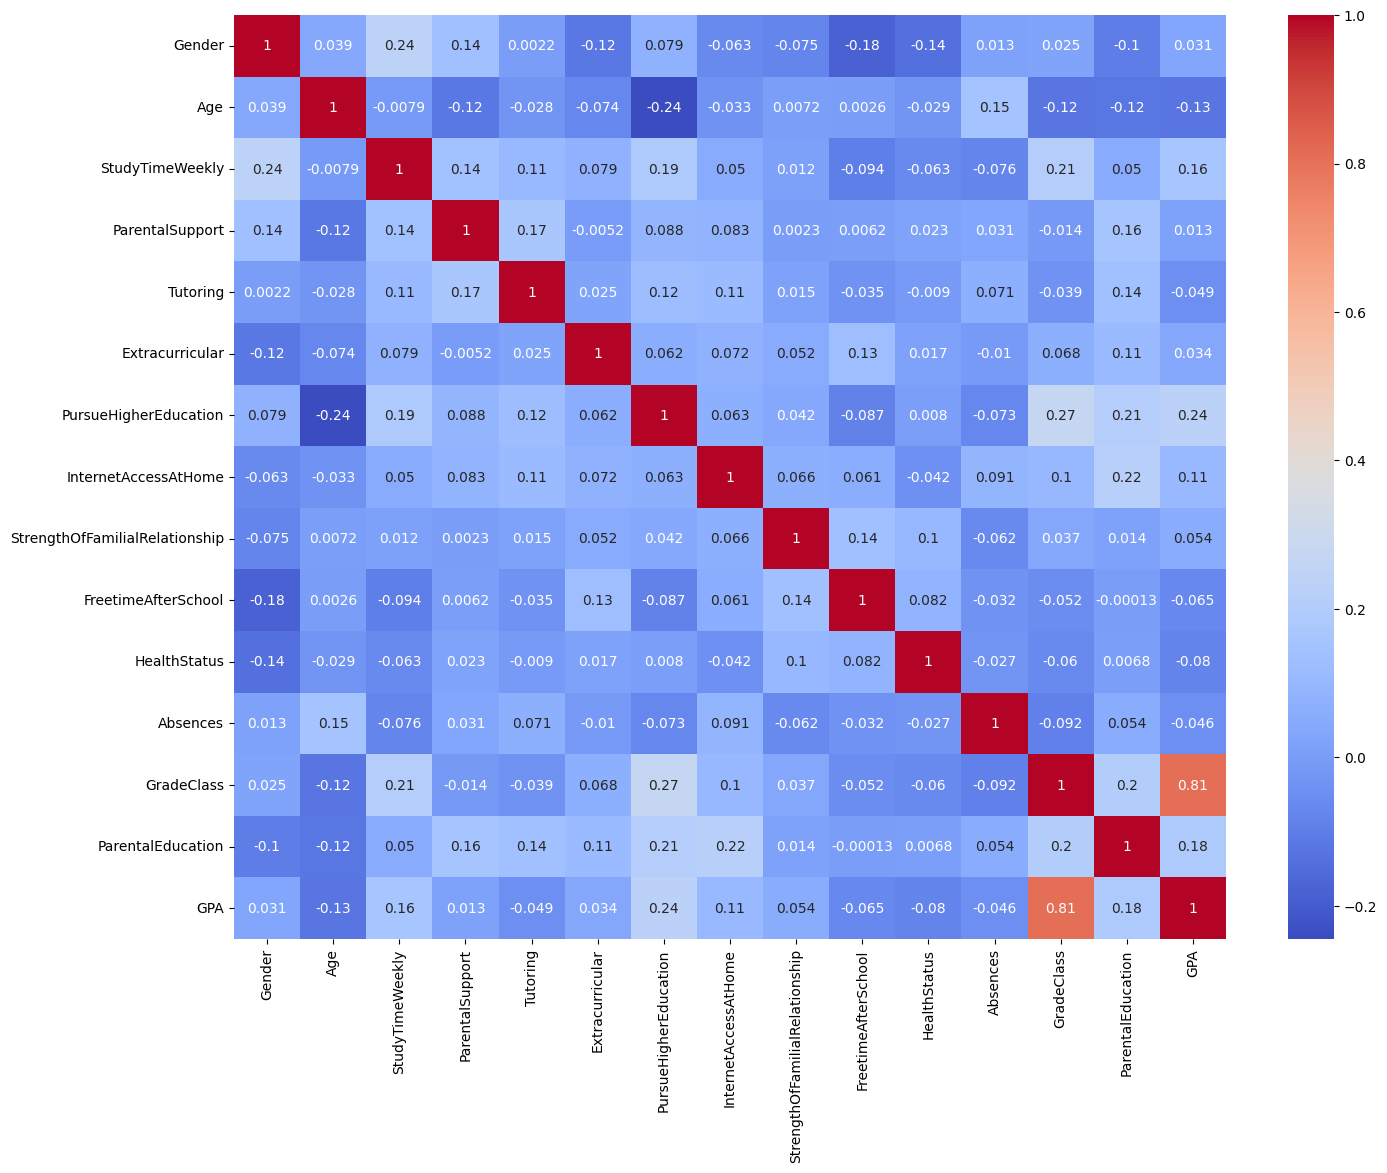

In [23]:
plt.figure(figsize=(16,12))
sns.heatmap(students2.corr(), annot = True, cmap = 'coolwarm')

In [24]:
students2.to_csv("NEW_Students2.csv", index = False)